# Data Generation and Initial Exploration
Clinical Decision Support System for Hyperthyroidism

## 1. Dataset Overview

In [ ]:
# Import required libraries
import pandas as pd
import numpy as np

# Load the thyroid dataset from the data folder
df = pd.read_csv("../data/thyroidDF.csv")

# Display dataset dimensions (number of rows and columns)
df.shape

In [12]:
# Display the first 5 rows to understand the structure of the dataset
df.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,target,patient_id
0,29,F,f,f,f,f,f,f,f,t,...,NaN,f,NaN,f,NaN,f,NaN,other,-,840801013
1,29,F,f,f,f,f,f,f,f,f,...,128.0,f,NaN,f,NaN,f,NaN,other,-,840801014
2,41,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,11.0,other,-,840801042
3,36,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,26.0,other,-,840803046
4,32,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,36.0,other,S,840803047


In [13]:
# Display general information about the dataset
# Includes column names, data types, and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9172 entries, 0 to 9171
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  9172 non-null   int64  
 1   sex                  8865 non-null   object 
 2   on_thyroxine         9172 non-null   object 
 3   query_on_thyroxine   9172 non-null   object 
 4   on_antithyroid_meds  9172 non-null   object 
 5   sick                 9172 non-null   object 
 6   pregnant             9172 non-null   object 
 7   thyroid_surgery      9172 non-null   object 
 8   I131_treatment       9172 non-null   object 
 9   query_hypothyroid    9172 non-null   object 
 10  query_hyperthyroid   9172 non-null   object 
 11  lithium              9172 non-null   object 
 12  goitre               9172 non-null   object 
 13  tumor                9172 non-null   object 
 14  hypopituitary        9172 non-null   object 
 15  psych                9172 non-null   o

In [ ]:
# Generate descriptive statistics for numerical variables
# Includes mean, standard deviation, min, max, quartiles
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,9172.0,7.355582e+01,1.183977e+03,1.000000e+00,3.700000e+01,5.500000e+01,6.800000e+01,6.552600e+04
TSH,8330.0,5.218403e+00,2.418401e+01,5.000000e-03,4.600000e-01,1.400000e+00,2.700000e+00,5.300000e+02
T3,6568.0,1.970629e+00,8.875788e-01,5.000000e-02,1.500000e+00,1.900000e+00,2.300000e+00,1.800000e+01
TT4,8730.0,1.087003e+02,3.752267e+01,2.000000e+00,8.700000e+01,1.040000e+02,1.260000e+02,6.000000e+02
T4U,8363.0,9.760557e-01,2.003604e-01,1.700000e-01,8.600000e-01,9.600000e-01,1.065000e+00,2.330000e+00
FTI,8370.0,1.136407e+02,4.155165e+01,1.400000e+00,9.300000e+01,1.090000e+02,1.280000e+02,8.810000e+02
TBG,349.0,2.987006e+01,2.108050e+01,1.000000e-01,2.100000e+01,2.600000e+01,3.100000e+01,2.000000e+02
patient_id,9172.0,8.529473e+08,7.581969e+06,8.408010e+08,8.504090e+08,8.510040e+08,8.607110e+08,8.701190e+08


## 2. Missing Values Analysis

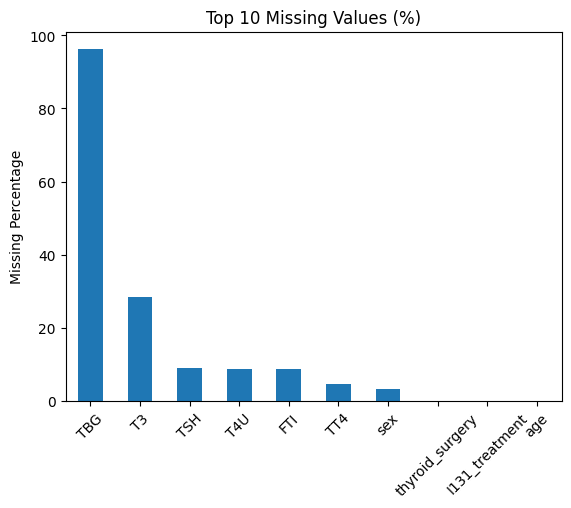

In [ ]:
import matplotlib.pyplot as plt

missing = (df.isna().mean()*100).sort_values(ascending=False)

missing.head(10).plot(kind="bar")
plt.title("Top 10 Missing Values (%)")
plt.ylabel("Missing Percentage")
plt.xticks(rotation=45)
plt.show()

## 3. Target Distribution

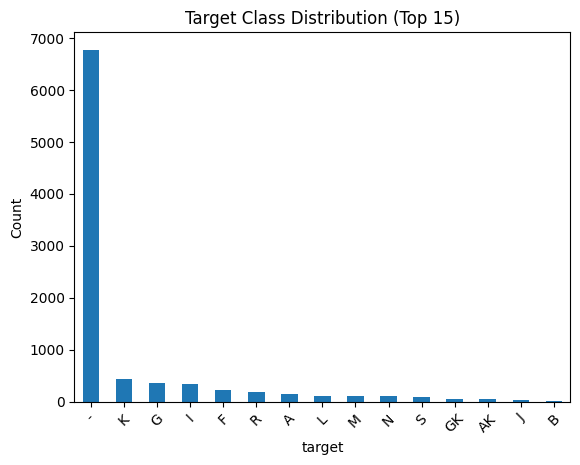

In [20]:
df["target"].value_counts().head(15).plot(kind="bar")
plt.title("Target Class Distribution (Top 15)")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

## 4. Outlier Detection

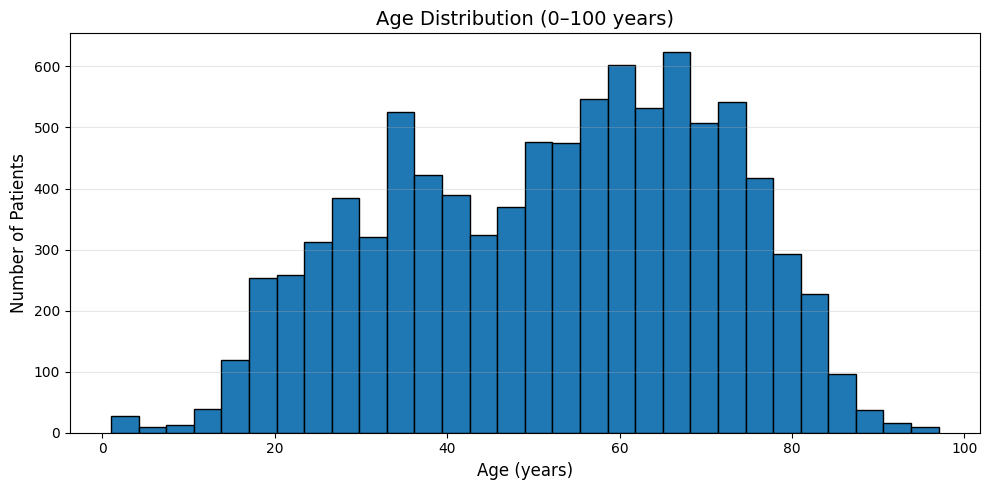

In [25]:
import matplotlib.pyplot as plt

# Filter realistic ages
df_age = df[(df["age"] >= 0) & (df["age"] <= 100)]

plt.figure(figsize=(10,5))

plt.hist(df_age["age"], bins=30, edgecolor="black")

plt.title("Age Distribution (0–100 years)", fontsize=14)
plt.xlabel("Age (years)", fontsize=12)
plt.ylabel("Number of Patients", fontsize=12)

plt.grid(axis="y", alpha=0.3)
plt.tight_layout()
plt.show()

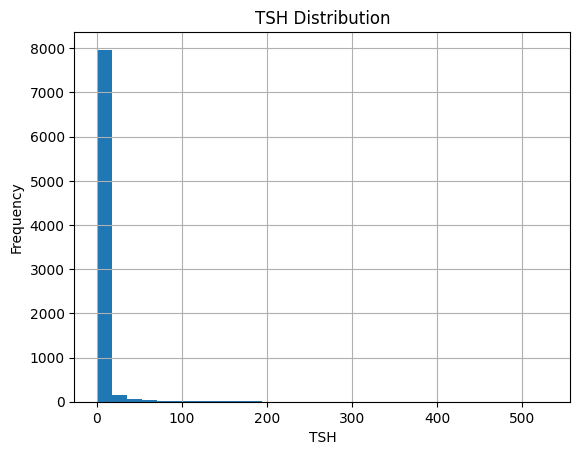

In [26]:
df["TSH"].dropna().hist(bins=30)
plt.title("TSH Distribution")
plt.xlabel("TSH")
plt.ylabel("Frequency")
plt.show()

## 5. Correlation Analysis

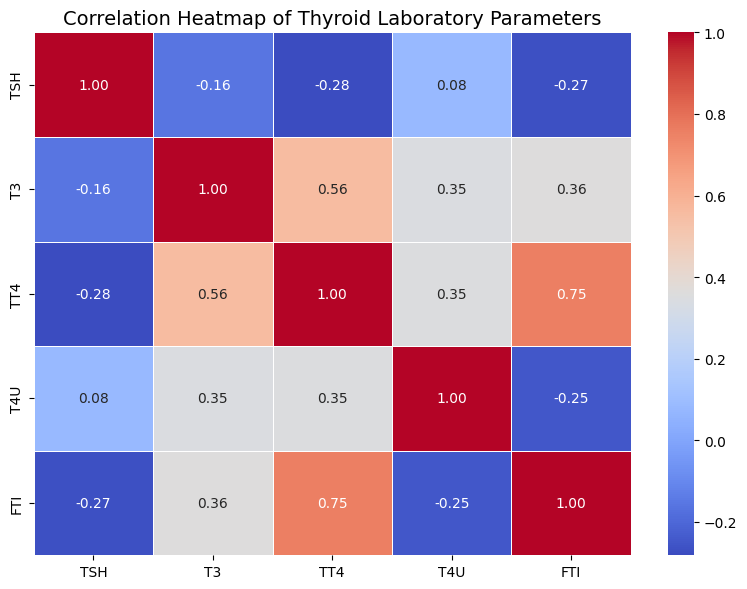

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select important lab features
lab_features = ["TSH", "T3", "TT4", "T4U", "FTI"]

# Drop missing values temporarily for correlation calculation
lab_df = df[lab_features].dropna()

# Compute correlation matrix
corr_matrix = lab_df.corr()

# Plot heatmap
plt.figure(figsize=(8,6))

sns.heatmap(
    corr_matrix,
    annot=True,          # show correlation values
    cmap="coolwarm",     # color map
    fmt=".2f",           # format numbers
    linewidths=0.5
)

plt.title("Correlation Heatmap of Thyroid Laboratory Parameters", fontsize=14)
plt.tight_layout()
plt.show()

### Heatmap Summary

The correlation analysis confirms expected medical relationships:

- TSH is negatively correlated with thyroid hormones.
- TT4 and FTI show strong positive correlation.
- T3 moderately correlates with TT4.

These findings validate the clinical reliability of the dataset.


In [17]:
# Display unique values of important categorical variables
for c in ["sex", "referral_source"]:
    print(c, df[c].unique())

# Identify columns that contain only 't'/'f' values
# These will need binary encoding in preprocessing
tf_cols = [
    c for c in df.columns 
    if df[c].dtype == "object" and 
    set(df[c].dropna().unique()).issubset({"t", "f"})
]

len(tf_cols), tf_cols[:10]

sex ['F' 'M' nan]
referral_source ['other' 'SVI' 'SVHC' 'STMW' 'SVHD' 'WEST']


(20,
 ['on_thyroxine',
  'query_on_thyroxine',
  'on_antithyroid_meds',
  'sick',
  'pregnant',
  'thyroid_surgery',
  'I131_treatment',
  'query_hypothyroid',
  'query_hyperthyroid',
  'lithium'])

In [18]:
# Create a structured summary report of the dataset
# This will be useful for documentation and thesis writing

report = {
    "rows": df.shape[0],                     # Number of instances
    "cols": df.shape[1],                     # Number of variables
    "missing_top10": missing.head(10).to_dict(),  # Top missing columns
    "target_dist": df["target"].value_counts().to_dict()  # Class distribution
}

report

{'rows': 9172,
 'cols': 31,
 'missing_top10': {'TBG': 96.19494112516355,
  'T3': 28.390754470126474,
  'TSH': 9.180113388573922,
  'T4U': 8.820322721325773,
  'FTI': 8.744003488879198,
  'TT4': 4.81901439162669,
  'sex': 3.347143480156999,
  'thyroid_surgery': 0.0,
  'I131_treatment': 0.0,
  'age': 0.0},
 'target_dist': {'-': 6771,
  'K': 436,
  'G': 359,
  'I': 346,
  'F': 233,
  'R': 196,
  'A': 147,
  'L': 115,
  'M': 111,
  'N': 110,
  'S': 85,
  'GK': 49,
  'AK': 46,
  'J': 30,
  'B': 21,
  'MK': 16,
  'O': 14,
  'Q': 14,
  'C|I': 12,
  'KJ': 11,
  'GI': 10,
  'H|K': 8,
  'D': 8,
  'FK': 6,
  'C': 6,
  'P': 5,
  'MI': 2,
  'LJ': 1,
  'GKJ': 1,
  'OI': 1,
  'D|R': 1,
  'E': 1}}

In [ ]:
# Create a small summary DataFrame containing the main dataset statistics
# This is useful for documentation and thesis writing

report = pd.DataFrame({
    "n_rows": [df.shape[0]],                 # Number of rows (samples)
    "n_cols": [df.shape[1]],                 # Number of columns (features)
    "missing_TBG_%": [missing["TBG"]],       # Missing percentage for TBG
    "missing_T3_%": [missing["T3"]],         # Missing percentage for T3
    "missing_TSH_%": [missing["TSH"]],       # Missing percentage for TSH
})

# Display the report
report

,n_rows,n_cols,missing_TBG_%,missing_T3_%,missing_TSH_%
0,9172,31,96.194941,28.390754,9.180113


In [ ]:
# Save the missing values percentage report into a CSV file
# This file can be used later for reporting and documentation
missing.to_csv("../data/missing_report.csv")

# Save the distribution of the target classes into a CSV file
# This helps document class imbalance in the dataset
df["target"].value_counts().to_csv("../data/target_distribution.csv")